# Support Vector Machine (SVM) and the Iris data set

If you have not already done so, install scikit-learn with:

pip install -U scikit-learn

## Iris DataFrame and NumPy Arrays

The following code is from iris_pandas.py

In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.spatial import voronoi_plot_2d, Voronoi, KDTree

path = "iris.data.csv"

iris_df = pd.read_csv(path, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

Create several useful np.arrays for cluster analysis (the names should be
self-explanatory)

In [4]:
sepal_length_array = np.array(iris_df["Sepal Length"])
sepal_width_array = np.array(iris_df["Sepal Width"])

petal_length_array = np.array(iris_df["Petal Length"])
petal_width_array = np.array(iris_df["Petal Width"])

sepal_array = np.array(iris_df[iris_df.columns[0:2]])
petal_array = np.array(iris_df[iris_df.columns[2:4]])

length_array = np.array(iris_df[["Sepal Length","Petal Length"]])
width_array = np.array(iris_df[["Sepal Width","Petal Width"]])

Create an array of entries equal to 0, 1, and 2 according to the species.
This will be helpful in plotting clusters

In [5]:
species = sepal_length_array = np.array(iris_df["Species"])

species_color = np.zeros(150,dtype = int)

species_color[species == 'Iris-setosa'] = 0
species_color[species == 'Iris-versicolor'] = 1
species_color[species == 'Iris-virginica'] =  2

## K-Means Clustering Synthetic Data Sets

The following code is from cluster_k-means.py

Create K normally distributed clusters (note k-means can be run for k <> K) by 
generating K normally distributed clusters of points with different means and stds

Choose K, the number of clusters

In [6]:
K = 3
k = 3

Size = np.random.randint(10,size = K) + 20

Means = np.random.randint(50,size = (K,2)) - 50/2
STDs=np.random.rand(K,2)*4 + 3

N = Size.sum()

xpts = np.array([])
ypts = np.array([])

X = np.array([])

for j in range(K):
    
    x = np.random.normal(Means[j,0], STDs[j,0], size=Size[j])
    y = np.random.normal(Means[j,1], STDs[j,1], size=Size[j]) 
            
    xpts = np.concatenate((xpts,x),axis = 0)
    ypts = np.concatenate((ypts,y),axis = 0)
    
    X = np.concatenate((X,j*np.ones(Size[j])))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


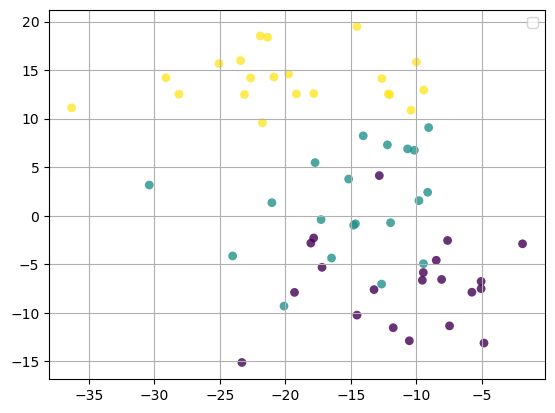

In [7]:
#%% Pause to plot the initial group assignment by color.
#
# Note: Colors overlap

fig, ax = plt.subplots()

#for color in range(K):
scale = 40
ax.scatter(xpts,ypts,  s=scale, c=X, alpha=0.8, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


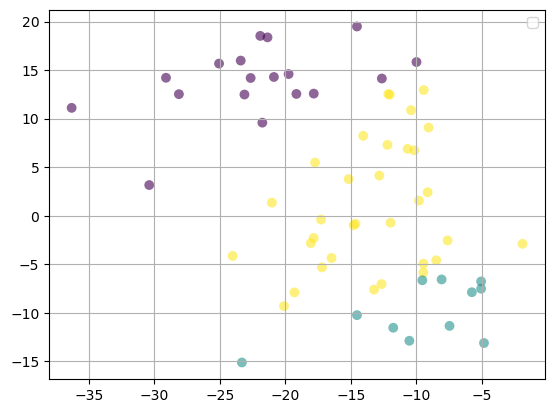

In [8]:
points = np.transpose(np.array([xpts,ypts]))
# Select k points to initialize the algorithm:

current_means = points[np.random.randint(N,size = k)]

# Compute the 3N x k distance matrix of distances from each point to the initial means

Dist = scipy.spatial.distance.cdist(points,current_means, metric='euclidean')

# The minimum distance in a row is the distance of the given point to the 
# closest mean. np.argmin returs 0, 1, ... k-1, for the closest mean

findgroup = np.argmin(Dist,axis = 1)


#%% Pause to plot the initial random group assignment by color:
    
fig, ax = plt.subplots()


scale = 50

ax.scatter(points[:,0],points[:,1], s=scale, c = findgroup,
             alpha= 0.6, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 Clustering is complete. 

The number of points to change at each step is: 

[ 0. 10.  3.  0.]


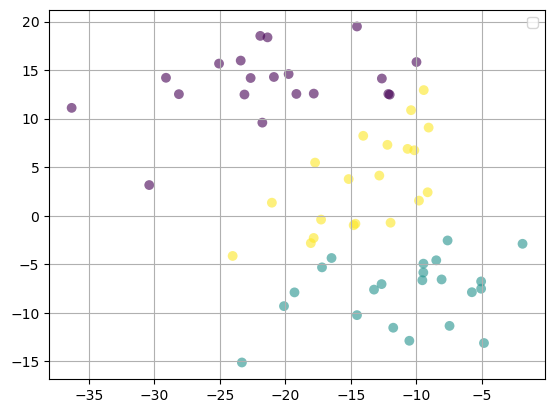

In [9]:
change = True

iters = 1

to_correct = np.zeros(100)

#%%
while change:
    current_means = np.zeros((k,2))
    for j in range(k):
    
        currentgroup = findgroup == j
        currentpoints = points[currentgroup]
        current_means[j,:] = np.mean(currentpoints,axis=0)
    
    Dist = scipy.spatial.distance.cdist(points,current_means, metric='euclidean')
    
    findgroupnew = np.argmin(Dist,axis = 1)
    
    
    if np.all(findgroupnew == findgroup):

        change = False
        
        print('\n','Clustering is complete.','\n')
        print('The number of points to change at each step is:','\n')
        print(to_correct[:(iters + 1)])
        
        fig, ax = plt.subplots()

        # for color in range(3):
        scale = 50
        ax.scatter(points[:,0],points[:,1], c=findgroup, s=scale, 
                  alpha= 0.6, edgecolors='none')
        
        # ax.scatter(points[:,0],points[:,1], c=X, s=scale, 
        #         alpha= 0.6, edgecolors='none')

        ax.legend()
        ax.grid(True)

        plt.show()


        
    else:
        
        Diff_bool = ~(findgroupnew == findgroup)
        to_correct[iters] = Diff_bool.sum()
        findgroup = findgroupnew
        iters +=1
        
        

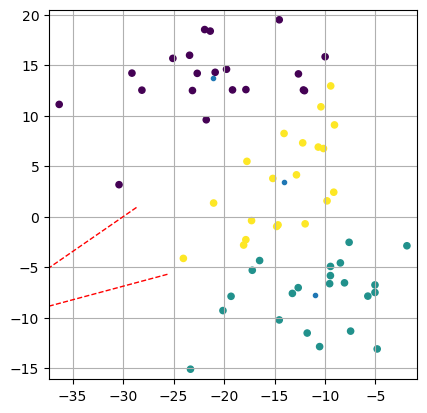

In [10]:
vor = Voronoi(current_means)

tree = KDTree(current_means)
locs, ids = tree.query(current_means)

fig,ax = plt.subplots(1,1)
voronoi_plot_2d(vor,ax,color='r',line_colors='red')
ax.scatter(points[:,0],points[:,1],s=20,c=findgroup)
#ax.scatter(points[:,0],points[:,1],s=20,c=species_color)
ax.set_xlim([np.min(points[:,0])-1,np.max(points[:,0])+1])
ax.set_ylim([np.min(points[:,1])-1,np.max(points[:,1])+1])           

ax.grid(True)
ax.set_aspect(1)
# for i in range(0,len(x)):
#     ax.annotate(ids[i], (x[i], y[i]), size = 10)

plt.show()

# Plot different SVM classifiers in the iris dataset

Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.

In [11]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

%matplotlib inline

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\lazlo\Anaconda\lib\site-packages\sklearn\inspection\__init__.py)

In [12]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset

X = width_array    #iris.data[:, :2]
y = species_color  #iris.target

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

In [ ]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Explorations

Modify the above scikit-learn code to apply SVM to the k-means clustering synthetic data
produce above. 